In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import os

def upload_and_read_image():
    """
    Upload an image using Google Colab's interface
    """
    print("Please upload an image file...")
    uploaded = files.upload()

    if not uploaded:
        raise ValueError("No image uploaded")

    filename = list(uploaded.keys())[0]

    img_bgr = cv2.imread(filename)
    if img_bgr is None:
        raise ValueError("Image could not be read")

    return img_bgr, filename

def display_images(images, titles, cols=2):
    """
    Display multiple images in a grid using matplotlib
    """
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5*rows))

    for idx, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, idx + 1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def task1_image_basics(img_bgr):
    """
    Perform basic image operations as specified in Task 1
    """
    print("Original Image:")
    display_images([img_bgr], ['Original BGR Image'])

    height, width, channels = img_bgr.shape
    print(f"\nImage Size: {width}x{height}")
    print(f"Number of channels: {channels}")

    total_pixels = height * width
    print(f"Total number of pixels: {total_pixels}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    threshold_value = 127
    _, img_binary = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY)

    display_images(
        [img_rgb, img_gray, img_binary],
        ['RGB Image', 'Grayscale Image', 'Binary Image']
    )

    black_pixels = np.sum(img_binary == 0)
    image_size = img_binary.size
    print(f"\nNumber of black pixels: {black_pixels}")
    print(f"Total image size in pixels: {image_size}")

    return img_bgr, img_rgb, img_gray, img_binary

def sobel_operator(img_gray):
    """Apply Sobel operator for edge detection"""
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    return np.uint8(np.absolute(sobel_combined))

def prewitt_operator(img_gray):
    """Apply Prewitt operator for edge detection"""
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    prewittx = cv2.filter2D(img_gray, -1, kernelx)
    prewitty = cv2.filter2D(img_gray, -1, kernely)
    prewitt_combined = cv2.magnitude(prewittx.astype('float'), prewitty.astype('float'))
    return np.uint8(prewitt_combined)

def roberts_operator(img_gray):
    """Apply Roberts Cross operator for edge detection"""
    kernelx = np.array([[1, 0], [0, -1]])
    kernely = np.array([[0, 1], [-1, 0]])
    robertsx = cv2.filter2D(img_gray, -1, kernelx)
    robertsy = cv2.filter2D(img_gray, -1, kernely)
    roberts_combined = cv2.magnitude(robertsx.astype('float'), robertsy.astype('float'))
    return np.uint8(roberts_combined)

def task2_image_processing(img_gray):
    """
    Perform advanced image processing operations as specified in Task 2
    """
    print("Edge Detection Results:")
    sobel_edges = sobel_operator(img_gray)
    prewitt_edges = prewitt_operator(img_gray)
    roberts_edges = roberts_operator(img_gray)
    canny_edges = cv2.Canny(img_gray, 100, 200)

    display_images(
        [sobel_edges, prewitt_edges, roberts_edges, canny_edges],
        ['Sobel Edge Detection', 'Prewitt Edge Detection',
         'Roberts Cross Edge Detection', 'Canny Edge Detection']
    )

    print("\nImage Segmentation Results:")
    _, global_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    adaptive_thresh = cv2.adaptiveThreshold(
        img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    ret, markers = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    markers = cv2.connectedComponents(markers)[1]
    markers = markers + 1
    markers[img_gray < 30] = 0
    colored_markers = cv2.applyColorMap(np.uint8(markers * 10), cv2.COLORMAP_JET)

    display_images(
        [global_thresh, adaptive_thresh, canny_edges, colored_markers],
        ['Global Thresholding', 'Adaptive Thresholding',
         'Canny Edge Segmentation', 'Watershed Segmentation']
    )

    return (sobel_edges, prewitt_edges, roberts_edges, canny_edges,
            global_thresh, adaptive_thresh, colored_markers)

In [9]:
img_bgr, filename = upload_and_read_image()

Please upload an image file...


Saving Picture1.jpg to Picture1 (3).jpg



=== Task 1: Basic Image Operations ===
Original Image:


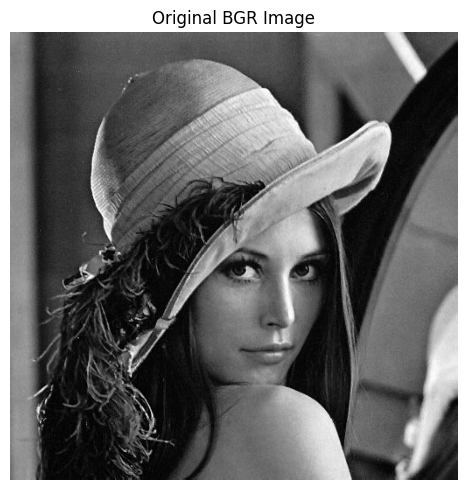


Image Size: 512x512
Number of channels: 3
Total number of pixels: 262144


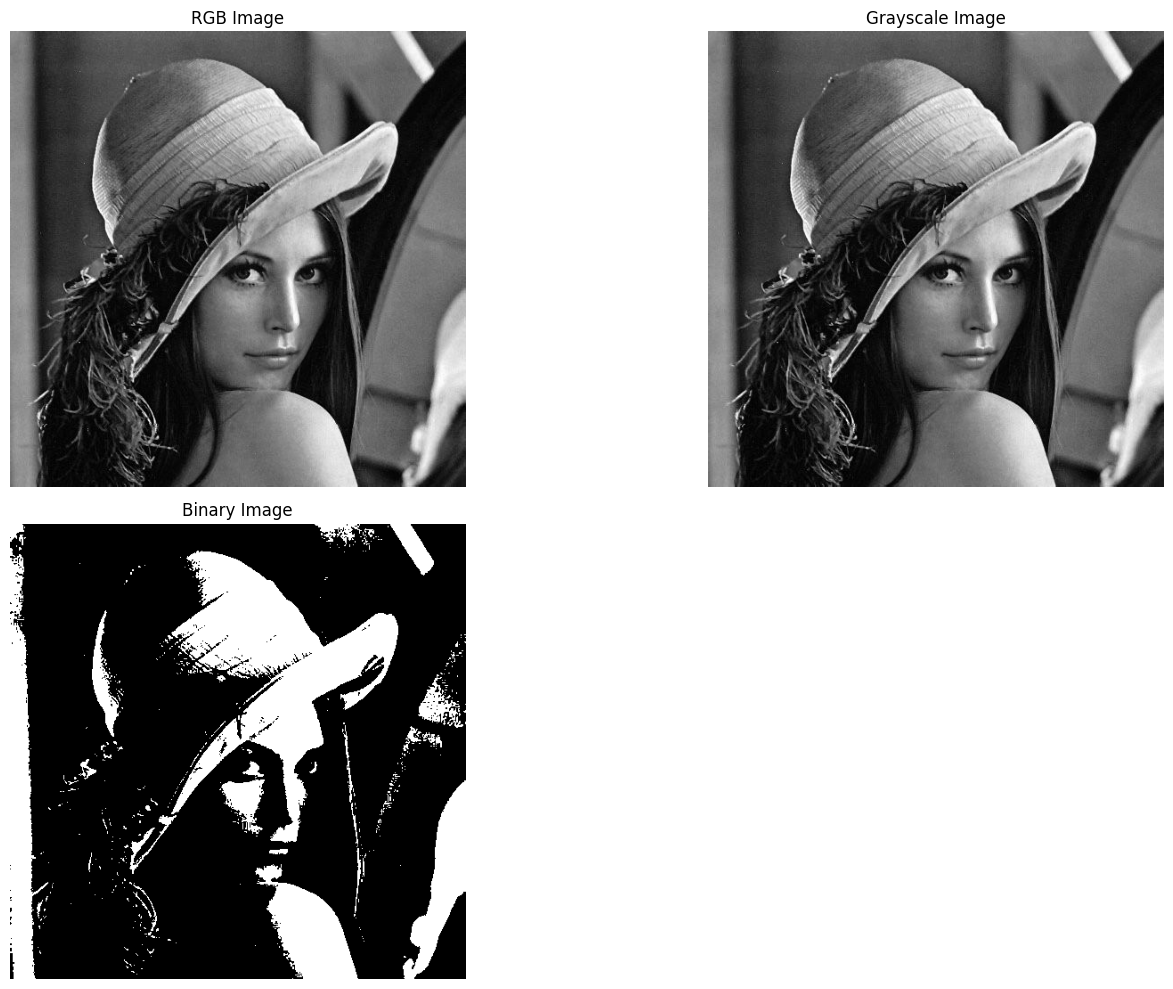


Number of black pixels: 199284
Total image size in pixels: 262144


In [10]:
print("\n=== Task 1: Basic Image Operations ===")
img_bgr, img_rgb, img_gray, img_binary = task1_image_basics(img_bgr)


=== Task 2: Advanced Image Processing ===
Edge Detection Results:


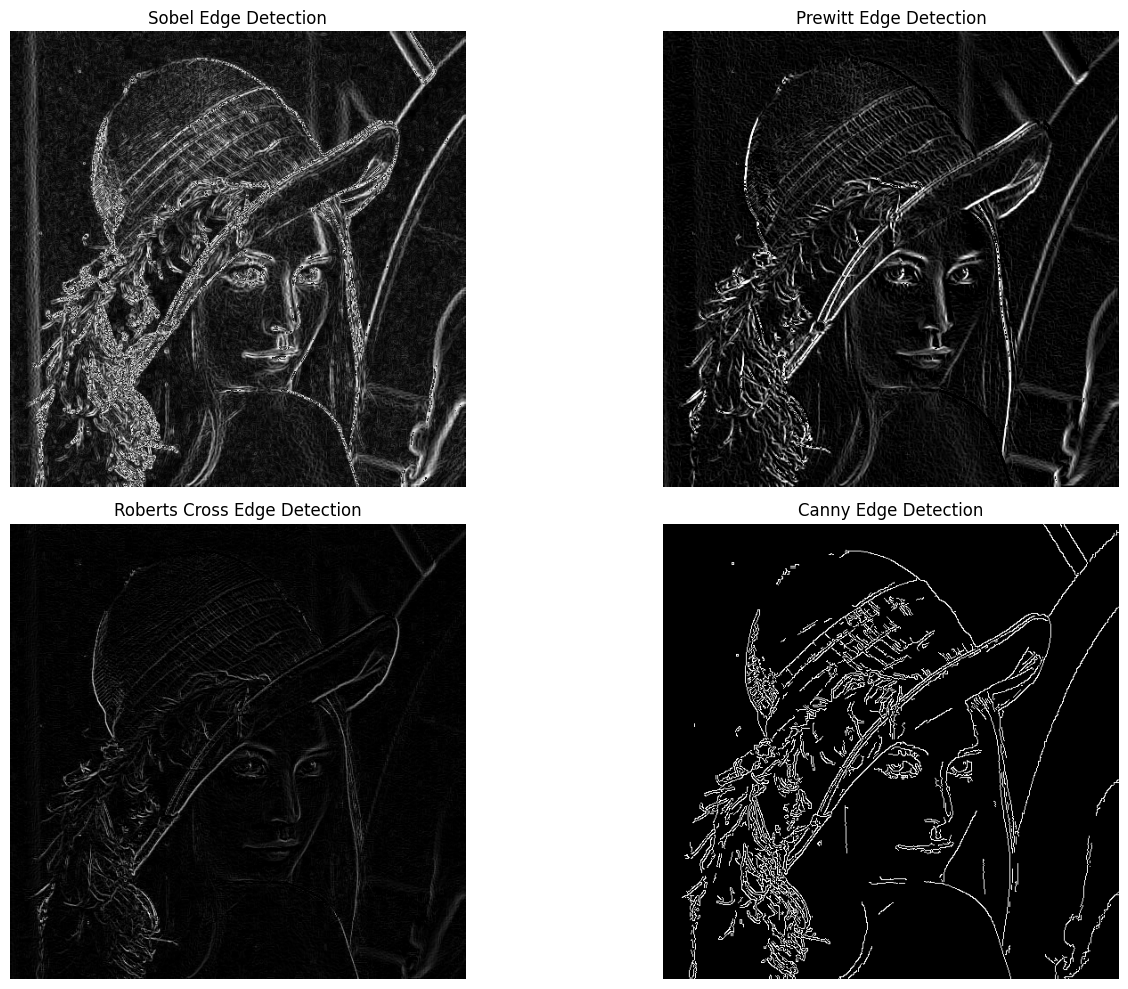


Image Segmentation Results:


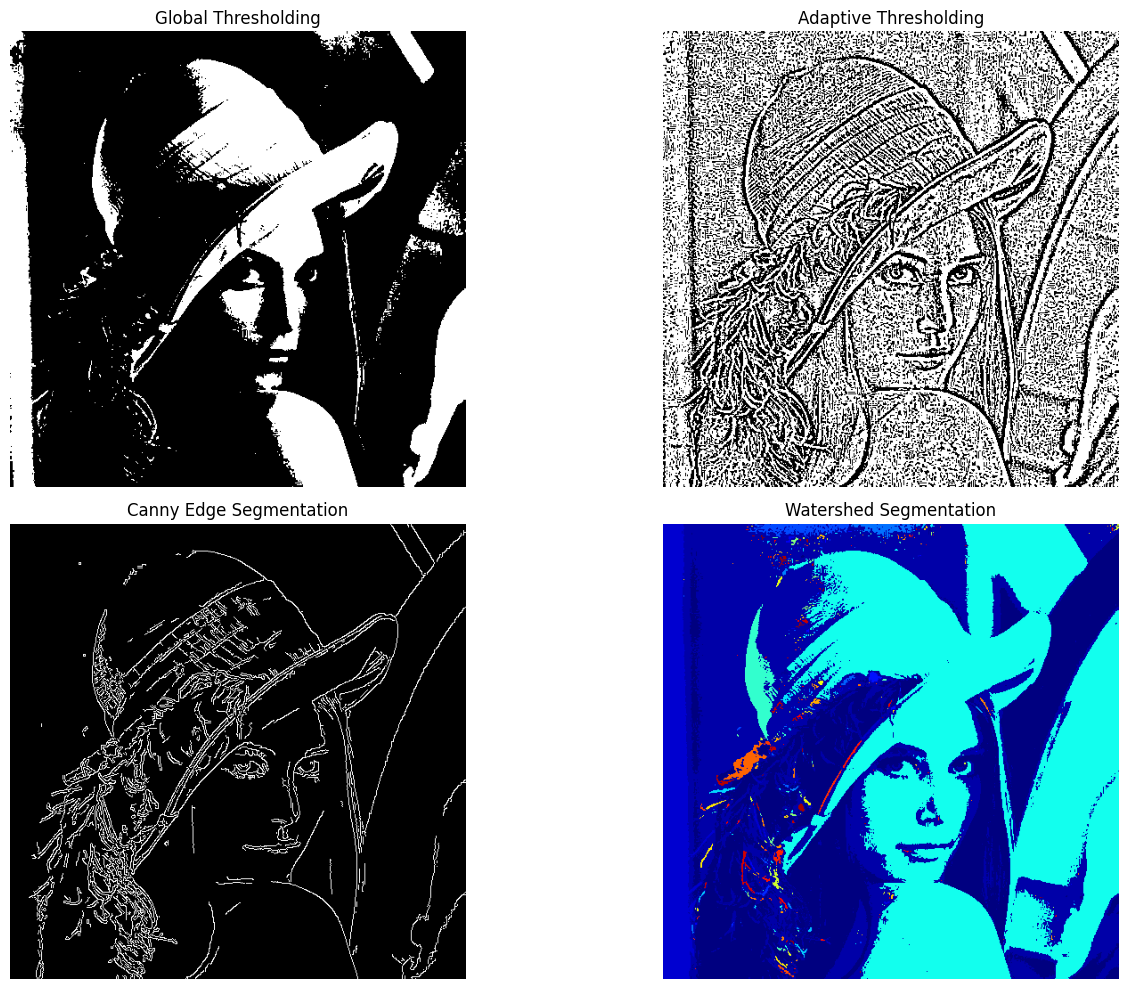

In [11]:
print("\n=== Task 2: Advanced Image Processing ===")
results = task2_image_processing(img_gray)